In [28]:
import os
import urllib
import pandas as pd
import numpy as np

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/pcm-dpc/COVID-19"
COVID_PATH = os.path.join("datasets", "covid")
COVID_REGIONI_URL = DOWNLOAD_ROOT + "/master/dati-regioni/dpc-covid19-ita-regioni.csv"
COVID_PROVINCE_URL = DOWNLOAD_ROOT + "/master/dati-province/dpc-covid19-ita-province.csv"

def fetch_dati_regione(regioni_url=COVID_REGIONI_URL, regioni_path=COVID_PATH):
    os.makedirs(regioni_path, exist_ok=True)
    path=os.path.join(regioni_path, "regioni.csv")
    urllib.request.urlretrieve(regioni_url, path)
    
def load_dati_regione(regioni_path=COVID_PATH):
    csv_path=os.path.join(regioni_path, "regioni.csv")
    return pd.read_csv(csv_path)

def fetch_dati_provincia(province_url=COVID_PROVINCE_URL, province_path=COVID_PATH):
    os.makedirs(province_path, exist_ok=True)
    path=os.path.join(province_path, "province.csv")
    urllib.request.urlretrieve(province_url, path)
    
def load_dati_provincia(province_path=COVID_PATH):
    csv_path=os.path.join(province_path, "province.csv")
    return pd.read_csv(csv_path)



In [53]:
fetch_dati_regione()
regioni=load_dati_regione()
regioni.head()

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_attualmente_positivi,nuovi_attualmente_positivi,dimessi_guariti,deceduti,totale_casi,tamponi
0,2020-02-24 18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,0,0,0,0,0,5
1,2020-02-24 18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,0,0,0,0,0,0
2,2020-02-24 18:00:00,ITA,4,P.A. Bolzano,46.499335,11.356624,0,0,0,0,0,0,0,0,0,1
3,2020-02-24 18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,0,0,0,0,0,1
4,2020-02-24 18:00:00,ITA,15,Campania,40.839566,14.250850,0,0,0,0,0,0,0,0,0,10


In [30]:
fetch_dati_provincia()
province=load_dati_provincia()
province.head()

,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi
0,2020-02-24 18:00:00,ITA,13,Abruzzo,69,Chieti,CH,42.351032,14.167546,0
1,2020-02-24 18:00:00,ITA,13,Abruzzo,66,L'Aquila,AQ,42.351222,13.398438,0
2,2020-02-24 18:00:00,ITA,13,Abruzzo,68,Pescara,PE,42.464584,14.213648,0
3,2020-02-24 18:00:00,ITA,13,Abruzzo,67,Teramo,TE,42.658918,13.704400,0
4,2020-02-24 18:00:00,ITA,13,Abruzzo,979,In fase di definizione/aggiornamento,NaN,0.000000,0.000000,0


In [31]:
regioni.shape

(588, 16)

In [32]:
regioni.describe()

,codice_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_attualmente_positivi,nuovi_attualmente_positivi,dimessi_guariti,deceduti,totale_casi,tamponi
count,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000
mean,10.190476,43.046293,12.225955,289.806122,48.772109,338.579932,276.840136,615.418367,79.316327,76.722789,58.064626,750.205782,3858.069728
std,5.799998,2.490900,2.661212,988.666023,135.735296,1122.451889,790.734604,1871.041502,201.632271,464.180085,283.325697,2581.655716,9087.057712
min,1.000000,38.115697,7.320149,0.000000,0.000000,0.000000,0.000000,0.000000,-63.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,41.125596,11.121231,2.000000,0.000000,2.000000,2.000000,5.000000,1.000000,0.000000,0.000000,6.000000,117.500000
50%,10.000000,43.616760,12.388247,19.000000,5.000000,24.500000,31.500000,58.000000,14.000000,0.000000,1.000000,61.000000,611.500000
75%,15.000000,45.434905,13.768136,128.000000,31.250000,163.000000,194.750000,379.250000,65.500000,6.250000,12.000000,400.750000,3084.000000
max,20.000000,46.499335,16.867367,9439.000000,1142.000000,10581.000000,8019.000000,17885.000000,1950.000000,5865.000000,3456.000000,27206.000000,70598.000000


In [33]:
day=regioni.data.copy()
import numpy as np
day=np.array(day)
for i in range(len(day)):
    day[i]=day[i][5:10]
    #Per estrarre mese e giorno prendiamo i caratteri dal 5 al 9 inclusi della feature "data"
#day=pd.Series(day)
#Non vedo l'utilità di renderlo Series, fammi sapere
regioni.insert(0,column='day', value=day)

#Hai evitato di mettere regioni["day"]=day per tenere questa feature al posto 0 vero?

In [34]:
day=province.data.copy()
day=np.array(day)
for i in range(len(day)):
    day[i]=day[i][5:10]
province.insert(0,column='day', value=day)


then we drop the 'data' & 'stato' column which are now useless

In [35]:
regioni=regioni.drop(['data','stato'],axis=1)
province=province.drop(['data','stato'],axis=1)

now we try to create a dataframe/dictionary which combines values of codice_regione with values of denominazione_regione

we know there are 20 regions so it is enough to access the data frame up to the 20th row. 

In [36]:
def combine_to_dict(df,upto,f1,f2):
    d12={}
    d21={}
    for i in range(upto):
        one=df.at[i,f1]
        two=df.at[i,f2]
        d12[one]=two
        d21[two]=one
    return d12,d21
d_num_as_key,d_reg_as_key=combine_to_dict(regioni,20,f1='codice_regione',f2='denominazione_regione')

now we will shorten the dataframe so that we store in another dataframe the longitude and latitude coordinates which do not change at all

In [37]:
def combine_to_datfr(df,row,col,upto):
    ind=[row[i] for i in range(upto)]
    dt=[]
    for i in range(upto):
        d=[]
        for feat in col:
            el=df.at[i,feat]
            d.append(el)
        dt.append(d)
    ret=pd.DataFrame(data=dt,index=ind,columns=col)
    return ret

new=combine_to_datfr(regioni,regioni.denominazione_regione,['lat','long'],20)
new
#Hai ucciso i poveri veneti, chi sarà a bere e bestemmiare adesso?

,lat,long
Abruzzo,42.351222,13.398438
Basilicata,40.639471,15.805148
P.A. Bolzano,46.499335,11.356624
Calabria,38.905976,16.594402
Campania,40.839566,14.250850
Emilia Romagna,44.494367,11.341721
Friuli Venezia Giulia,45.649435,13.768136
Lazio,41.892770,12.483667
Liguria,44.411493,8.932699
Lombardia,45.466794,9.190347


In [38]:
def create_geo_loc(df):
    geo_loc=regioni.denominazione_regione.copy()
    geo_loc=pd.DataFrame(data=geo_loc)
    geo_loc["lat"]=regioni.lat.copy()
    geo_loc["long"]=regioni.long.copy()
    num=len(geo_loc)-21
    geo_loc.drop(geo_loc.tail(num).index,inplace=True)
    return geo_loc
create_geo_loc(regioni)

#Mi rendo conto che non è uguale al dataframe che hai creato tu
#Non mi sono avventurato nei tuoi for, però anche così non mi sembra malaccio
#Se ci tieni ad avere i nomi delle regioni come indici (anche se non ne vedo l'utilità), guardati set_index di pd

,denominazione_regione,lat,long
0,Abruzzo,42.351222,13.398438
1,Basilicata,40.639471,15.805148
2,P.A. Bolzano,46.499335,11.356624
3,Calabria,38.905976,16.594402
4,Campania,40.839566,14.250850
5,Emilia Romagna,44.494367,11.341721
6,Friuli Venezia Giulia,45.649435,13.768136
7,Lazio,41.892770,12.483667
8,Liguria,44.411493,8.932699
9,Lombardia,45.466794,9.190347


In [39]:
#A first analysis

as we can see, we have each day a number of measurements for 21 regions (numbered from 1 to 20)

we can simply extract the number of observations of the civil protection by dividing the shape of the dataframe by 21

In [40]:
n_obs=int(regioni.shape[0]/21)
n_reg=21


In [41]:
def get_regione(df,name,period):
    n_obs=int(regioni.shape[0]/period)
    index=np.arange(1,n_obs+1)

    for i in range(period):
        if df.at[i,'denominazione_regione']==name:
            start=i
            break
    d=regioni[start::period]
    d=d.drop(['denominazione_regione','lat','long','codice_regione'],axis=1)
    ind={}
    a=np.arange(1,n_obs+1)
    b=np.arange(start,regioni.shape[0],step=period)
    for i in range(len(b)):
        ind[b[i]]=a[i]
    d=d.rename(index=ind)
    
    
    return d
Lom=get_regione(regioni,'Lombardia',21)
Ven=get_regione(regioni,'Veneto',21)
#"Day" lo teniamo in inglese con le altre features in italiano?
Lom

,day,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_attualmente_positivi,nuovi_attualmente_positivi,dimessi_guariti,deceduti,totale_casi,tamponi
1,02-24,76,19,95,71,166,166,0,6,172,1463
2,02-25,79,25,104,127,231,65,0,9,240,3700
3,02-26,79,25,104,145,249,18,0,9,258,3208
4,02-27,172,41,213,136,349,100,40,14,403,3320
5,02-28,235,47,282,192,474,125,40,17,531,4835
6,02-29,256,80,336,216,552,78,40,23,615,5723
7,03-01,406,106,512,375,887,335,73,24,984,6879
8,03-02,478,127,605,472,1077,190,139,38,1254,7925
9,03-03,698,167,865,461,1326,249,139,55,1520,9577
10,03-04,877,209,1086,411,1497,171,250,73,1820,12138


In [42]:
def get_regione_2(df, name):
    df_copy=df.copy()
    dati_regione = df_copy.loc[df['denominazione_regione'] == name]
    dati_regione.drop(["codice_regione", "denominazione_regione", "lat", "long"], axis=1, inplace=True)
    dati_regione=dati_regione.reset_index(drop=True)
    return dati_regione
get_regione_2(regioni, "Lombardia")

,day,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_attualmente_positivi,nuovi_attualmente_positivi,dimessi_guariti,deceduti,totale_casi,tamponi
0,02-24,76,19,95,71,166,166,0,6,172,1463
1,02-25,79,25,104,127,231,65,0,9,240,3700
2,02-26,79,25,104,145,249,18,0,9,258,3208
3,02-27,172,41,213,136,349,100,40,14,403,3320
4,02-28,235,47,282,192,474,125,40,17,531,4835
5,02-29,256,80,336,216,552,78,40,23,615,5723
6,03-01,406,106,512,375,887,335,73,24,984,6879
7,03-02,478,127,605,472,1077,190,139,38,1254,7925
8,03-03,698,167,865,461,1326,249,139,55,1520,9577
9,03-04,877,209,1086,411,1497,171,250,73,1820,12138


In [43]:
def get_giorno(df, day):
    return df.loc[df['day'] == day]
get_giorno(regioni, "02-24")
#get_giorno(province, "02-24")


,day,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_attualmente_positivi,nuovi_attualmente_positivi,dimessi_guariti,deceduti,totale_casi,tamponi
0,02-24,13,Abruzzo,42.351222,13.398438,0,0,0,0,0,0,0,0,0,5
1,02-24,17,Basilicata,40.639471,15.805148,0,0,0,0,0,0,0,0,0,0
2,02-24,4,P.A. Bolzano,46.499335,11.356624,0,0,0,0,0,0,0,0,0,1
3,02-24,18,Calabria,38.905976,16.594402,0,0,0,0,0,0,0,0,0,1
4,02-24,15,Campania,40.839566,14.250850,0,0,0,0,0,0,0,0,0,10
5,02-24,8,Emilia Romagna,44.494367,11.341721,10,2,12,6,18,18,0,0,18,148
6,02-24,6,Friuli Venezia Giulia,45.649435,13.768136,0,0,0,0,0,0,0,0,0,58
7,02-24,12,Lazio,41.892770,12.483667,1,1,2,0,2,2,1,0,3,124
8,02-24,7,Liguria,44.411493,8.932699,0,0,0,0,0,0,0,0,0,1
9,02-24,3,Lombardia,45.466794,9.190347,76,19,95,71,166,166,0,6,172,1463


In [44]:
def get_provincia(name, df=province): 
    df_copy=df.copy()
    dati_provincia = df_copy.loc[df_copy['denominazione_provincia'] == name]
    dati_provincia.drop(["codice_regione", "denominazione_regione", "lat", "long", "denominazione_provincia", "sigla_provincia", "codice_provincia"], axis=1, inplace=True)
    dati_provincia=dati_provincia.reset_index(drop=True)
    return dati_provincia
pisa=get_provincia("Pisa")
pisa.set_index("day", inplace=True)

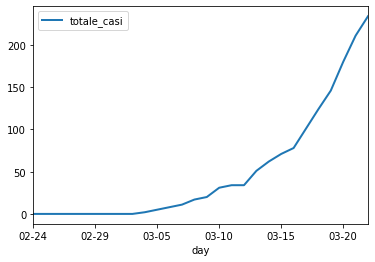

In [45]:
import matplotlib.pyplot as plt
pisa.plot(linewidth=2)

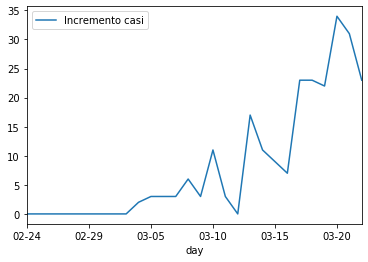

In [46]:
def compute_increase(provincia=pisa):
    casi = provincia.totale_casi.copy()
    casi=np.array(casi)
    incr=casi.copy()
    incr[1:]=casi[1:]-casi[:-1]
    increase=pd.DataFrame(data=incr, index=provincia.index)
    return increase
increase=compute_increase()
increase.set_axis(['Incremento casi'], axis=1, inplace=True)
increase.plot()

In [47]:
def get_regione_by_provincia(name,df=province):
    df_copy=df.copy()
    dati_regione = df_copy.loc[df['denominazione_regione'] == name]
    dati_regione.drop(["codice_regione", "denominazione_regione", "lat", "long"], axis=1, inplace=True)
    dati_regione=dati_regione.reset_index(drop=True)
    return dati_regione
get_regione_by_provincia("Lombardia")

,day,codice_provincia,denominazione_provincia,sigla_provincia,totale_casi
0,02-24,16,Bergamo,BG,0
1,02-24,17,Brescia,BS,0
2,02-24,13,Como,CO,0
3,02-24,19,Cremona,CR,0
4,02-24,97,Lecco,LC,0
...,...,...,...,...,...
359,03-22,108,Monza e della Brianza,MB,1108
360,03-22,18,Pavia,PV,1306
361,03-22,14,Sondrio,SO,205
362,03-22,12,Varese,VA,386


In [48]:
regioni

,day,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_attualmente_positivi,nuovi_attualmente_positivi,dimessi_guariti,deceduti,totale_casi,tamponi
0,02-24,13,Abruzzo,42.351222,13.398438,0,0,0,0,0,0,0,0,0,5
1,02-24,17,Basilicata,40.639471,15.805148,0,0,0,0,0,0,0,0,0,0
2,02-24,4,P.A. Bolzano,46.499335,11.356624,0,0,0,0,0,0,0,0,0,1
3,02-24,18,Calabria,38.905976,16.594402,0,0,0,0,0,0,0,0,0,1
4,02-24,15,Campania,40.839566,14.250850,0,0,0,0,0,0,0,0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,03-22,9,Toscana,43.769231,11.255889,706,215,921,1223,2144,239,42,91,2277,13264
584,03-22,4,P.A. Trento,46.068935,11.121231,235,46,281,604,885,165,34,35,954,3050
585,03-22,10,Umbria,43.106758,12.388247,97,35,132,368,500,53,5,16,521,3135
586,03-22,2,Valle d'Aosta,45.737503,7.320149,63,21,84,270,354,50,1,9,364,950


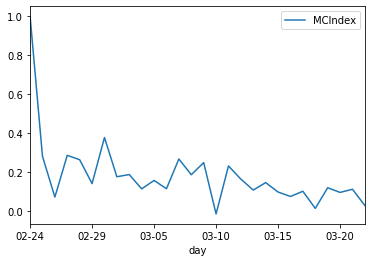

In [49]:
#Questo è un piccolissimo test: mio padre (MC) mi ha fatto notare che un indice interessante 
#è il rapporto fra il numero di nuovi positivi e il numero totale di attualmente positivi
regioni["MCIndex"]=regioni["nuovi_attualmente_positivi"]/regioni["totale_attualmente_positivi"]
reg=pd.DataFrame(data=get_regione_2(regioni, "Lombardia"), columns=["day", "MCIndex"])
reg.set_index("day", inplace=True)
reg.plot()

In [50]:
regioni.tail()

,day,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_attualmente_positivi,nuovi_attualmente_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,MCIndex
583,03-22,9,Toscana,43.769231,11.255889,706,215,921,1223,2144,239,42,91,2277,13264,0.111474
584,03-22,4,P.A. Trento,46.068935,11.121231,235,46,281,604,885,165,34,35,954,3050,0.186441
585,03-22,10,Umbria,43.106758,12.388247,97,35,132,368,500,53,5,16,521,3135,0.106000
586,03-22,2,Valle d'Aosta,45.737503,7.320149,63,21,84,270,354,50,1,9,364,950,0.141243
587,03-22,5,Veneto,45.434905,12.338452,1113,255,1368,3276,4644,430,309,169,5122,57671,0.092593
